<a href="https://colab.research.google.com/github/Kristelwen/TM10007_PROJECT/blob/master/brat_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment
Kristel, Lalot, Marijn, Tahisa



---


# Outline opdracht


---


Gebaseerd op beeldvorming moeten we eruit kunnen halen wat voor een soort tumor het is?
Je wil weten of het HIGH of LOW grade is.

In [10]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/Kristelwen/TM10007_PROJECT

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [0]:
# Importing modules
# General packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from time import time
from sklearn import datasets as ds
from scipy.stats import randint

# Preprocessing packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# SVM Kernels
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics.pairwise import rbf_kernel, sigmoid_kernel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import KernelPCA

# Model selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

# Regularization
from sklearn.linear_model import Lasso, RidgeClassifier
from sklearn.feature_selection import SelectFromModel

In [12]:
# Data loading functions. Uncomment the one you want to use
# from adni.load_data import load_data
from brats.load_data import load_data
#from hn.load_data import load_data

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')


The number of samples: 167
The number of columns: 725


In [0]:
data_top = data.head()  

# display  
# data_top 

# Preprocessing

In [0]:
# Drop columns which contain NaN values
threshold = math.floor(len(data)/2)  # calculate threshold, half of total rows
data_drop = data.dropna(thresh=threshold, axis=1)  # Delete columns/features with more than 'threshold' NaNs
data_drop = data_drop.dropna(axis=0)  # Delete rows/subjects with NaNs

# Split data and labels
labels = data_drop['label']
data_drop = data_drop.drop(columns="label")  # Data without labels

# Convert labels 'GBM' and 'LGG' to respectively 0 and 1
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Delete columns with strings (2 columns)
# data_strings = data_drop.select_dtypes(include=[object])
# columns_strings = list(data_strings.columns)
# data_no_strings = data_drop.drop(columns_strings, axis=1)

# Replace infinity values with NaN
#data_no_strings = data_no_strings.replace([np.inf, -np.inf], np.nan)
# print(np.isinf(data_no_strings.values).any()) - check if dataframe contains infinity values

# Split the data in a train (80%) and test set (20%) - OF MOET DIT VOOR FEATURE SCALING? Omdat je niks mag fitten op testdata
data_train, data_test, label_train, label_test = train_test_split(data_drop, labels, test_size=0.1)
data_train2, data_val, label_train2, label_val = train_test_split(data_train, label_train, test_size=0.1)

# Feature scaling
scaler = RobustScaler()
transformer = scaler.fit(data_train2.values)
data_scaled_train2 = transformer.transform(data_train2.values)
data_df_train2 = pd.DataFrame(data_scaled_train2, index = data_train2.index, columns = data_train2.columns)

data_scaled_val = transformer.transform(data_val.values)
data_df_val = pd.DataFrame(data_scaled_val, index = data_val.index, columns = data_val.columns)

data_scaled_test = transformer.transform(data_test.values)
data_df_test = pd.DataFrame(data_scaled_test, index = data_test.index, columns = data_test.columns)

# Optie 1 feature selection: PCA
  # Training set 2
pca_train = PCA(n_components=80)  # Create a PCA with 20 components
pca_train.fit(data_scaled_train2)  # Fit PCA
data_train_pca2 = pca_train.transform(data_scaled_train2)  # Transform train data using PCA
#df_train_pca2 = pd.DataFrame(data_train_pca2, index = data_scaled_train2.index)  # Put train data back in dataframe with 20 most important features
 
  # Training set 1
#data_train_pca = pca_train.transform(data_train)
  # Validatie set
data_val_pca = pca_train.transform(data_scaled_val)  # Transform test data using PCA

  # Test set
data_test_pca = pca_train.transform(data_scaled_test)  # Transform test data using PCA


# Transforming data
transformer1 = scaler.fit(data_train.values)
data_scaled_train = transformer1.transform(data_train.values)
data_df_train = pd.DataFrame(data_scaled_train, index = data_train.index, columns = data_train.columns)





# Optie 2 feature selection: RFECV


# Learning curves & bias variance dillema

In [0]:
# print(df_train_pca)
# pd.DataFrame(data_val_pca)


## Ridgen

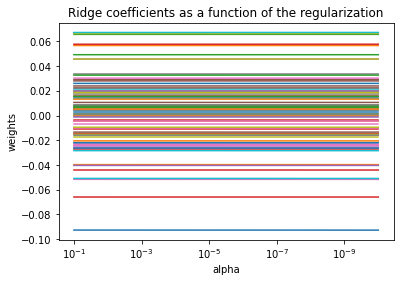

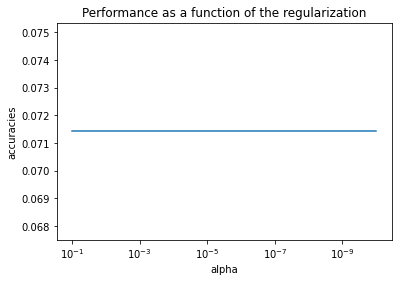

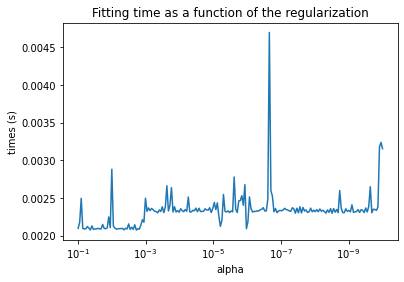

In [0]:
# Display the weights and compute error for multiple values for alpha
n_alphas = 200
alphas = np.logspace(-10, -1, n_alphas)

# Construct classifiers
coefs = []
accuracies = []
times = []
for a in alphas:
    # Fit classifier
    clf = RidgeClassifier(alpha=a, fit_intercept=False)
    t0 = time()
    clf.fit(data_train_pca, label_train)
    duration = time() - t0
    val_pred = clf.predict(data_val_pca)
    message = ("\t Misclassified: %d / %d" % ((label_validation != val_pred).sum(), label_validation.shape[0]))
    # print(message)
    
    # Append statistics
    accuracy = float((label_validation != val_pred).sum()) / float(label_validation.shape[0])
    times.append(duration)
    accuracies.append(accuracy)
    coefs.append(clf.coef_)

# #############################################################################
# Display results

# Weights
plt.figure()
ax = plt.gca()
ax.plot(alphas, np.squeeze(coefs))
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Performance
plt.figure()
ax = plt.gca()
ax.plot(alphas, accuracies)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('accuracies')
plt.title('Performance as a function of the regularization')
plt.axis('tight')
plt.show()

# Times
plt.figure()
ax = plt.gca()
ax.plot(alphas, times)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('times (s)')
plt.title('Fitting time as a function of the regularization')
plt.axis('tight')
plt.show()


## Random Forest Classifier with PCA

In [0]:
#default settings 
n_samples=len(data_val_pca)
homemade_random_forest = BaggingClassifier(RandomForestClassifier()) 
homemade_random_forest.fit(data_train_pca,label_train) #fit the classifier on the training set 
test=homemade_random_forest.predict(data_val_pca) #test 
error= (sum(abs(test - label_val))/n_samples)*100
error = (round(error, 2))
print ('the error when using default settings is {}%'.format(error))

print ('')#  ff voor overzicht 

#using different n_trees and bootstrapping  
n_trees=[5,10,50,100,150,200,300,400,500,600]
for n_tree in n_trees:
  clf = RandomForestClassifier(n_estimators=n_tree, bootstrap=True)
  clf.fit(data_train_pca2,label_train2)
  
  predictions_train = clf.predict(data_train_pca2)
  errors_train = (sum(abs(predictions_train - label_train2))/n_samples)*100
  errors_train = (round(errors_train, 2))
  
  print ('Train set: When using bootstrapping and {} trees, the error is {}%'.format(n_tree,errors_train))

  predictions_val = clf.predict(data_val_pca)
  errors_val = (sum(abs(predictions_val - label_val))/n_samples)*100
  errors_val = (round(errors_val, 2))

  print ('Validation set: When using bootstrapping and {} trees, the error is {}%'.format(n_tree,errors_val))

print ('')

#using different n_trees without bootstrapping  
n_trees=[5,10,50,100,150,200,300,400,500,600]
for n_tree in n_trees:
  clf = RandomForestClassifier(n_estimators=n_tree, bootstrap=False)
  clf.fit(data_train_pca2,label_train2)
  
  predictions_train = clf.predict(data_train_pca2)
  errors_train = (sum(abs(predictions_train - label_train2))/n_samples)*100
  errors_train = (round(errors_train, 2))
  
  print ('Train set: Without bootstrapping and {} trees, the error is {}%'.format(n_tree,errors_train))

  predictions_val = clf.predict(data_val_pca)
  errors_val = (sum(abs(predictions_val - label_val))/n_samples)*100
  errors_val = (round(errors_val, 2))

  print ('Validation set: Without bootstrapping and {} trees, the error is {}%'.format(n_tree,errors_val))

the error when using default settings is 50.0%

Train set: When using bootstrapping and 5 trees, the error is 21.43%
Validation set: When using bootstrapping and 5 trees, the error is 28.57%
Train set: When using bootstrapping and 10 trees, the error is 14.29%
Validation set: When using bootstrapping and 10 trees, the error is 21.43%
Train set: When using bootstrapping and 50 trees, the error is 0.0%
Validation set: When using bootstrapping and 50 trees, the error is 42.86%
Train set: When using bootstrapping and 100 trees, the error is 0.0%
Validation set: When using bootstrapping and 100 trees, the error is 21.43%
Train set: When using bootstrapping and 150 trees, the error is 0.0%
Validation set: When using bootstrapping and 150 trees, the error is 35.71%
Train set: When using bootstrapping and 200 trees, the error is 0.0%
Validation set: When using bootstrapping and 200 trees, the error is 42.86%
Train set: When using bootstrapping and 300 trees, the error is 0.0%
Validation set: W

In [0]:
# Hyperparameter optimization of Random Forest Classifier

# Our parameter to optimize is the number of estimators, which we vary uniformlybetween 1 and 400
param_distributions = {'n_estimators': randint(1, 400)}

# Now use the classifiers on all datasets
fitted_clfs = list()
    
# Within a 5-fold cross-validation, try out 20 different number of trees
clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions, cv=5, n_iter=20, random_state=42)

# Fit the classifier
clf.fit(data_train_pca2, label_train2)

# Save for next part
fitted_clfs.append(clf)

In [0]:
# Get the best estimator and best parameters belonging to that estimator
print(f'\n The best estimator is {clf.best_estimator_} \n The best amount of trees is {clf.best_params_}')


 The best estimator is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
 The best amount of trees is {'n_estimators': 100}


In [0]:
#Random Forest classifier as a function 
def RandomForest(n_trees,data_train_pca2,data_val_pca,labels_train2,labels_val):
  clf = RandomForestClassifier(n_estimators=n_trees, bootstrap=True)
  clf.fit(data_train_pca2,label_train2)
  predictions_train = clf.predict(data_train_pca2)
  n_samples=len(data_train_pca2)
  errors_train = (sum(abs(predictions_train - label_train2))/n_samples)*100
  errors_train = (round(errors_train, 2))
  accuracy_train=100-errors_train

  clf.fit(data_val_pca,label_val)
  predictions_val = clf.predict(data_val_pca)
  n_samples=len(data_val_pca)
  errors_val = (sum(abs(predictions_val - label_val))/n_samples)*100
  errors_val = (round(errors_val, 2))
  accuracy_val=100-errors_val

  return (accuracy_train, accuracy_val)

acc = RandomForest(15,data_train_pca2,data_val_pca,label_train2,label_val)
print(f'Accuracy of Random Forest Classifier for the training set is {acc[0]} and for the validation set is {acc[1]}')

Accuracy of Random Forest Classifier for the training set is 99.15 and for the validation set is 100.0


In [0]:
predictions_test = clf.predict(data_test_pca)
n_samples=len(data_test_pca)
errors_test = (sum(abs(predictions_test - label_test))/n_samples)*100
errors_test = (round(errors_test, 2))
accuracy_test=100-errors_test

print(f'Accuracy of Random Forest Classifier for the test set is {accuracy_test}')

Accuracy of Random Forest Classifier for the test set is 86.67


## Random forest with feature_importances_

Feature ranking:


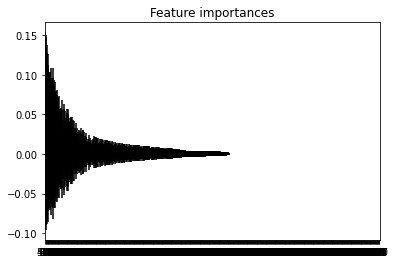

              VOLUME_ET  VOLUME_NET  VOLUME_TC  ...    TGM_dw  TGM_Cog_X_1   TGM_T_1
ID                                              ...                                 
TCGA-02-0054   0.009213   -0.155913  -0.303851  ... -0.126667     0.367354 -0.244696
TCGA-HT-7690  -0.004308    3.447175   1.727131  ... -0.146667    -0.493349  1.368851
TCGA-DU-7015  -0.436870    1.019589   0.142896  ... -0.146667    -0.646295  0.898538
TCGA-02-0033   0.581257   -0.208380  -0.053949  ...  0.253333    -0.298654  0.400745
TCGA-DU-6542   0.042584    0.127731  -0.127138  ... -0.146667    -0.770591  0.341693
...                 ...         ...        ...  ...       ...          ...       ...
TCGA-06-0139   0.472462    0.125268   0.081563  ... -0.126667     0.386104  0.244979
TCGA-HT-8563  -0.173681   -0.383796  -0.522107  ...  2.131108    -0.772237 -0.818008
TCGA-08-0355   0.399688   -0.276771  -0.181362  ...  5.179556    -0.698695 -0.136629
TCGA-08-0390   0.055475   -0.158175  -0.282521  ...  0.540000    

In [0]:
# Feature importances
forest = RandomForestClassifier(n_estimators=100, bootstrap=True)

forest.fit(data_df_train2, label_train2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# for f in range(data_df_train2.shape[1]):
    # print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_df_train2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_df_train2.shape[1]), indices)
plt.xlim([-1, data_df_train2.shape[1]])
plt.show()

# Only keep features with importance > 0.00
mask = importances > 0
mask2 = data_df_train2.columns[mask]
data_train2_selection = data_df_train2[mask2]
print(data_train2_selection)

In [0]:
#default settings 
n_samples=len(data_scaled_val)
# BaggingClassifier().coef_ = BaggingClassifier().feature_importances_
homemade_random_forest = BaggingClassifier(RandomForestClassifier()) 
# homemade_random_forest.coef_ = homemade_random_forest.feature_importances_
selector = RFECV(homemade_random_forest, step=1, cv=5)
selector = selector.fit(data_df_train2, label_train2)
selector.support_
print(selector.ranking_)


homemade_random_forest.fit(data_scaled_train2,label_train2) #fit the classifier on the training set 
test=homemade_random_forest.predict(data_scaled_val) #test 
error= (sum(abs(test - label_val))/n_samples)*100
error = (round(error, 2))
print ('the error when using default settings is {}%'.format(error))

print ('')#  ff voor overzicht 

#using different n_trees and bootstrapping  
n_trees=[5,10,50,100,150,200,300,400,500,600]
for n_tree in n_trees:
  clf = RandomForestClassifier(n_estimators=n_tree, bootstrap=True)
  clf.fit(data_scaled_train2, label_train2)
  
  predictions_train = clf.predict(data_scaled_train2)
  errors_train = (sum(abs(predictions_train - label_train2))/n_samples)*100
  errors_train = (round(errors_train, 2))
  
  print ('Train set: When using bootstrapping and {} trees, the error is {}%'.format(n_tree,errors_train))

  predictions_val = clf.predict(data_scaled_val)
  errors_val = (sum(abs(predictions_val - label_val))/n_samples)*100
  errors_val = (round(errors_val, 2))

  print ('Validation set: When using bootstrapping and {} trees, the error is {}%'.format(n_tree,errors_val))

print ('')

#using different n_trees without bootstrapping  
n_trees=[5,10,50,100,150,200,300,400,500,600]
for n_tree in n_trees:
  clf = RandomForestClassifier(n_estimators=n_tree, bootstrap=False)
  clf.fit(data_scaled_train2,label_train2)
  
  predictions_train = clf.predict(data_scaled_train2)
  errors_train = (sum(abs(predictions_train - label_train2))/n_samples)*100
  errors_train = (round(errors_train, 2))
  
  print ('Train set: Without bootstrapping and {} trees, the error is {}%'.format(n_tree,errors_train))

  predictions_val = clf.predict(data_scaled_val)
  errors_val = (sum(abs(predictions_val - label_val))/n_samples)*100
  errors_val = (round(errors_val, 2))

  print ('Validation set: Without bootstrapping and {} trees, the error is {}%'.format(n_tree,errors_val))

AttributeError: ignored

## Hyperparameter optimization of Random Forest Classifier

In [0]:
# Our parameter to optimize is the number of estimators, which we vary uniformlybetween 1 and 400
param_distributions = {'n_estimators': randint(1, 400)}

# Now use the classifiers on all datasets
fitted_clfs = list()
    
# Within a 5-fold cross-validation, try out 20 different number of trees
clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions, cv=5, n_iter=20, random_state=42)

# Fit the classifier
clf.fit(data_scaled_train2, label_train2)

# Save for next part
fitted_clfs.append(clf)

In [0]:
# Get the best estimator and best parameters belonging to that estimator
print(f'\n The best estimator is {clf.best_estimator_} \n The best amount of trees is {clf.best_params_}')


 The best estimator is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=271,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
 The best amount of trees is {'n_estimators': 271}


In [0]:
#Random Forest classifier as a function 
def RandomForest(n_trees,data_scaled_train,data_scaled_val,labels_train2,labels_val):
  clf = RandomForestClassifier(n_estimators=n_trees, bootstrap=True)
  clf.fit(data_scaled_train2,label_train2)
  predictions_train = clf.predict(data_scaled_train2)
  n_samples=len(data_scaled_train2)
  errors_train = (sum(abs(predictions_train - label_train2))/n_samples)*100
  errors_train = (round(errors_train, 2))
  accuracy_train=100-errors_train

  clf.fit(data_scaled_val,label_val)
  predictions_val = clf.predict(data_scaled_val)
  n_samples=len(data_scaled_val)
  errors_val = (sum(abs(predictions_val - label_val))/n_samples)*100
  errors_val = (round(errors_val, 2))
  accuracy_val=100-errors_val

  return (accuracy_train, accuracy_val)

acc = RandomForest(15,data_scaled_train2,data_scaled_val,label_train2,label_val)
print(f'Accuracy of Random Forest Classifier for the training set is {acc[0]} and for the validation set is {acc[1]}')

Accuracy of Random Forest Classifier for the training set is 99.15 and for the validation set is 100.0


In [0]:
predictions_test = clf.predict(data_scaled_test)
n_samples=len(data_scaled_test)
errors_test = (sum(abs(predictions_test - label_test))/n_samples)*100
errors_test = (round(errors_test, 2))
accuracy_test=100-errors_test

print(f'Accuracy of Random Forest Classifier for the test set is {accuracy_test}')

Accuracy of Random Forest Classifier for the test set is 86.67


## Support Vector Machine with PCA

In [10]:
#Construct classifiers
svmlin = SVC(kernel='linear', gamma='scale') # linear kernel 
svmrbf = SVC(kernel='rbf', gamma='scale') # radial basis function kernel 
svmpoly = SVC(kernel='poly', degree=3, gamma='scale') # polynomial kernel

clsfs = [svmlin, svmrbf, svmpoly]

# for clf in clsfs: # voor alle classifiers in lijst
#    clf.fit(data_train_pca2, label_train2) # fit classifier op trainingsset
#    val = clf.predict(data_val) # test classifier op testset
#    error = (sum(abs(val - label_val))/len(data_val))*100 # hoevaak fout? 
#    error = (round(error, 2))
#    accuracy = 100 - error
    # print(f'The Accuracy of SVM is {accuracy}%')

# functie
def SVM(clsfs, data_train_pca2, data_val_pca, label_train2, label_val): 
    accuracies_train = list()
    accuracies_val = list()

    for clf in clsfs:
      clf.fit(data_train_pca2,label_train2)
      predictions_train = clf.predict(data_train_pca2)
      n_samples=len(data_train_pca2)
      errors_train = (sum(abs(predictions_train - label_train2))/n_samples)*100
      errors_train = (round(errors_train, 2))
      accuracy_train=100-errors_train
      accuracies_train.append(accuracy_train)
      
      clf.fit(data_val_pca,label_val)
      predictions_val = clf.predict(data_val_pca)
      n_samples=len(data_val_pca)
      errors_val = (sum(abs(predictions_val - label_val))/n_samples)*100
      errors_val = (round(errors_val, 2))
      accuracy_val=100-errors_val
      accuracies_val.append(accuracy_val)

    return (accuracies_train, accuracies_val)

accuracies_train, accuracies_val = SVM(clsfs, data_train_pca2, data_val_pca, label_train2, label_val)

clsfs_names = ['SVM with linear kernel', 'SVM with radial basis function kernel', 'SVM with polynomial kernel']
for num, acc_train in enumerate(accuracies_train):
    print(f'\n The accuracy of {clsfs_names[num]} is {acc_train}% for the train set and {accuracies_val[num]}% for the validation set')



 The accuracy of SVM with linear kernel is 100.0% for the train set and 100.0% for the validation set

 The accuracy of SVM with radial basis function kernel is 67.52000000000001% for the train set and 92.86% for the validation set

 The accuracy of SVM with polynomial kernel is 67.52000000000001% for the train set and 92.86% for the validation set


## Hyperparameters SVM

In [39]:
# Parameters
degrees = randint(1, 5)
coef0s = [1, 0.5, 0.01]
slacks = [0.1,1, 10, 100]
gammas = [1, 0.1 ,0.01, 0.001]
kernels = ['linear', 'rbf', 'poly']

# Creating paramater space
param_grid = {'degree': degrees,'coef0': coef0s, 'C': slacks, 'gamma': gammas, 'kernel': kernels}

# Searching for best parameters
SVM = RandomizedSearchCV(SVC(),param_grid,cv=5, random_state=42, return_train_score=True)
# Fitting classifier on training set
SVM.fit(data_train_pca2, label_train2)

# Predict parameters
train2_pred = SVM.predict(data_train_pca2)
val_pred = SVM.predict(data_val_pca)
# train_pred = SVM.predict(data_train_pca)
test_pred = SVM.predict(data_test_pca)

# Calculating scores
folds = 3
score = cross_val_score(SVM.best_estimator_, data_df_train, label_train, cv=folds)  # Train set
mean_score = score.mean()

# Print final best estimator and accuracies
# Best estimator
print("\n###############################################################")
print(f'\n The best estimator is {SVM.best_estimator_} \n \n The best settings are {SVM.best_params_}\n')
print("###############################################################\n")


# Confusion matrix and classification report
print('Confusion matrix and classification report of training set')
print(confusion_matrix(label_train2, train2_pred))
print(classification_report(label_train2, train2_pred))
print("---------------------------------------------------------------\n")

print('Confusion matrix and classification report of validation set')
print(confusion_matrix(label_val, val_pred))
print(classification_report(label_val, val_pred))
print("---------------------------------------------------------------\n")

print('Confusion matrix and classification report of test set')
print(confusion_matrix(label_test, test_pred))
print(classification_report(label_test, test_pred))

# Accuracy of Validation set:
print("\n###############################################################\n")
print(f'\n The accuracy of the validation set in the n={folds} different folds is {score}')
print(f'\n The mean accuracy of the validation set of n={folds} different folds is {mean_score}')
print("\n###############################################################\n")

# Evaluate SVM on training set
acc_train = accuracy_score(label_train2, train2_pred)
print(f'\n The accuracy of the training set is {acc_train}')

# Evaluate SVM on validation set
acc_val = accuracy_score(label_val, val_pred)
print(f'\n The accuracy of the validation set is {acc_val}')

# Evaluate SVM on test set
acc_test = accuracy_score(label_test, test_pred)
print(f'\n The accuracy of the test set is {acc_test}')


###############################################################

 The best estimator is SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
 
 The best settings are {'C': 10, 'coef0': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'linear'}

###############################################################

Confusion matrix and classification report of training set
[[83  0]
 [ 0 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        34

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

---------------------------------------------------------------

Confusion matrix and classificat

## Learning Curves

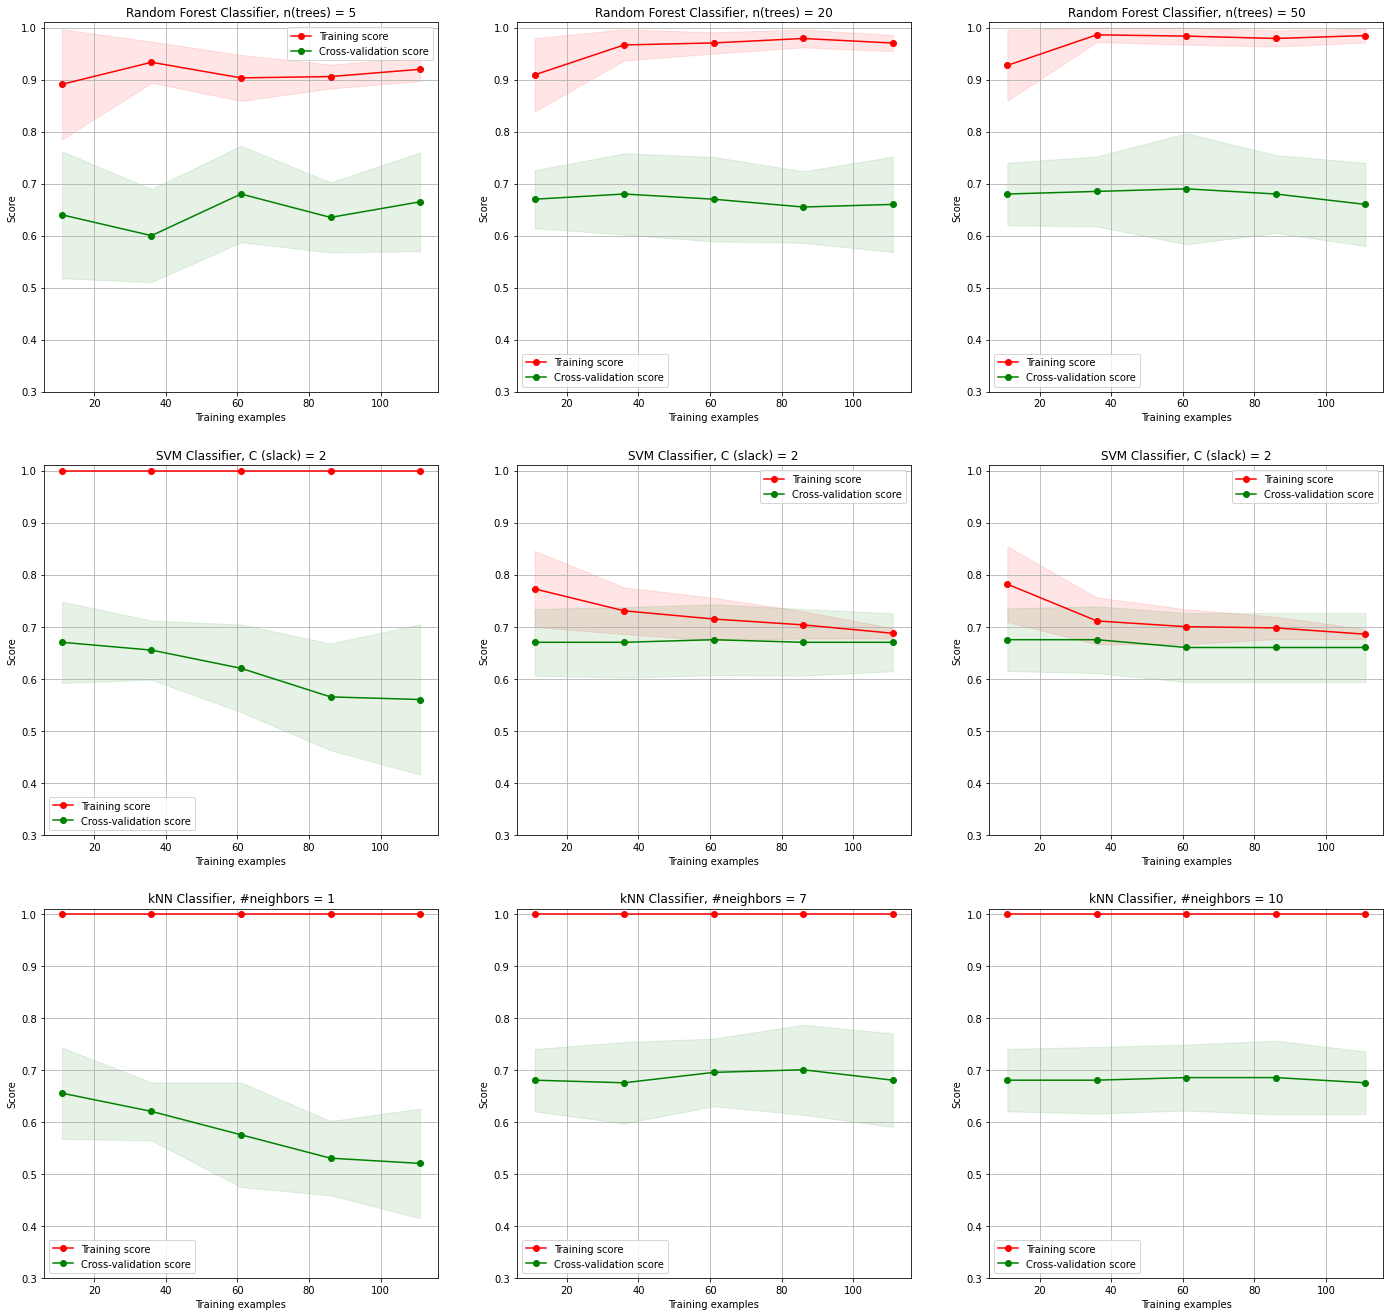

In [0]:
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores  = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt


# First make plot without classifiers:
# Construct classifiers
svmlin = SVC(C=2, kernel='linear', gamma='scale') # linear kernel 
svmrbf = SVC(C=2, kernel='rbf', gamma='scale') # radial basis function kernel 
svmpoly = SVC(C=2, kernel='poly', degree=3, gamma='scale') # polynomial kernel

clsfs = [
         RandomForestClassifier(n_estimators=5, min_samples_leaf=3, max_features='auto', random_state=0, bootstrap=True),
         RandomForestClassifier(n_estimators=20, min_samples_leaf=3, random_state=0, bootstrap=True),
         RandomForestClassifier(n_estimators=50, min_samples_leaf=3, random_state=0, bootstrap=True),
         svmlin, svmrbf, svmpoly,
         KNeighborsClassifier(n_neighbors=1, weights='distance'),
         KNeighborsClassifier(n_neighbors=7, weights='distance'),
         KNeighborsClassifier(n_neighbors=10, weights='distance')
        ]

# Plot figuren
fig = plt.figure(figsize=(24,8*len(clsfs)))
# ax.scatter(data_train_pca[:, 0], data_train_pca[:, 1], marker='o', c=label_train,
#     s=25, edgecolor='k', cmap=plt.cm.Paired)
    
        
# Create a cross-validation object
cv = ShuffleSplit(n_splits=10, test_size=0.15, random_state=0)
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# cv = StratifiedShuffleSplit(n_splits=10, test_size=0.15, random_state=0)

# Now use the classifiers on all datasets
num = 0
for clf in clsfs:
    # Split data in training and testing
    # title = str(type(clf))
    if hasattr(clf, 'n_estimators'):
        title = f"Random Forest Classifier, n(trees) = {clf.n_estimators}"
    elif hasattr(clf, 'C'):
        title = f"SVM Classifier, C (slack) = {clf.C}"
    elif hasattr(clf, 'n_neighbors'):
        title = f"kNN Classifier, #neighbors = {clf.n_neighbors}"
    ax = fig.add_subplot(len(clsfs), 3, num + 1)
    plot_learning_curve(clf, title, data_train_pca, label_train, ax, ylim=(0.3, 1.01), cv=cv)
    num += 1
